In [1]:
import numpy as np

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.image as Image
import PIL.Image as Image


In [2]:
m_check = ModelCheckpoint("model/--{epoch:02d}--{val_loss:.4f}.hdf5", monitor = 'val_loss',save_best_only=True)


In [3]:
x = np.load("../train.npy")
print(x[0])

y = np.load("y.npy")


[[[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]
  [0.2        0.2        0.2       ]
  ...
  [0.2        0.2        0.2       ]
  [0.36470588 0.36470588 0.36470588]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]


In [4]:
def create_model():
    n = 16
    learn = 1e-3
    opt = optimizers.Adamax(lr=learn)

    
    model = Sequential()
    model.add(Conv2D(n*16,(3,3),padding='same',activation='relu',input_shape=(112,150,3)))
    model.add(Conv2D(n*8,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n*4,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(n*2,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(n*4,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(n*2,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(9,activation="softmax"))

    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['acc'])

    return model


In [5]:
seed = np.random.seed(666)

kf = KFold(n_splits=3, shuffle=True,random_state=seed)


In [6]:

x_train,x_test , y_train,y_test = train_test_split(x,y,shuffle=True , random_state=seed)

In [7]:
# history = []
# model = create_model()
# for train_i,test_i in kf.split(x):
#     train_x,train_y = x[train_i],y[train_i]
#     test_x, test_y = x[test_i], y[test_i]

#     hist = model.fit(train_x,train_y,batch_size=30,epochs=50,validation_split=0.25,callbacks=[m_check])
#     history.append(hist)
#     score = model.evaluate(test_x,test_y)
#     print(score)

In [8]:
model = create_model()
# model = load_model("./model/--30--0.0843.hdf5")
history = model.fit(x_train,y_train,batch_size=30,epochs=50,validation_split=0.25,callbacks=[m_check])

Epoch 1/50
85/85 [==============================] - 13s 155ms/step - loss: 1.7930 - acc: 0.3726 - val_loss: 2.2245 - val_acc: 0.2855
Epoch 2/50
85/85 [==============================] - 6s 71ms/step - loss: 0.9954 - acc: 0.6298 - val_loss: 2.9380 - val_acc: 0.2690
Epoch 3/50
85/85 [==============================] - 6s 69ms/step - loss: 0.5999 - acc: 0.7882 - val_loss: 5.0543 - val_acc: 0.2512
Epoch 4/50
85/85 [==============================] - 6s 69ms/step - loss: 0.4334 - acc: 0.8510 - val_loss: 4.9198 - val_acc: 0.3709
Epoch 5/50
85/85 [==============================] - 6s 69ms/step - loss: 0.2880 - acc: 0.9016 - val_loss: 5.2555 - val_acc: 0.3246
Epoch 6/50
85/85 [==============================] - 6s 70ms/step - loss: 0.2764 - acc: 0.9072 - val_loss: 0.9468 - val_acc: 0.7204
Epoch 7/50
85/85 [==============================] - 6s 74ms/step - loss: 0.7561 - acc: 0.7744 - val_loss: 2.3862 - val_acc: 0.4100
Epoch 8/50
85/85 [==============================] - 6s 73ms/step - loss: 0.4235 -

In [9]:
predy = model.evaluate(x_test,y_test)
print(predy)

36/36 [==============================] - 1s 26ms/step - loss: 8.0423 - acc: 0.3618
[8.042342185974121, 0.36177778244018555]


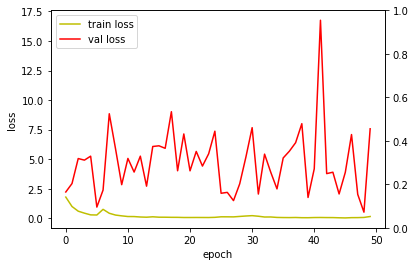

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')


plt.show()

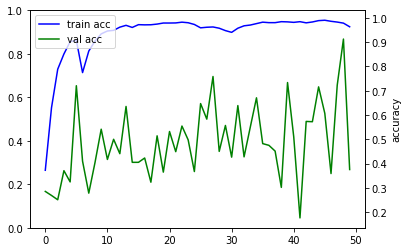

In [11]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history


acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()